In [2]:
import re
import operator

word_counts = {}
file = open('romeoandjuliet.txt', 'r')
text = file.read().lower()
match = re.findall(r'\b[a-z\'\-]{1,100}\b', text)
for word in match:
    count = word_counts.get(word,0)
    word_counts[word] = count + 1

sorted_counts = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)

# Check counts
#for word, count in sorted_counts:
#    print(word + ': ' + str(count))

FileNotFoundError: ignored

In [0]:
# For plotting purposes only
words, counts = zip(*sorted_counts)
word_order = []
for i in range(len(words)):
    word_order.append(i)

# Get ranks
count_dict = {}   # count:words with that count (rank is occurrence in sorted count_dictionary)
for pair in sorted_counts:
    word = pair[0]
    count = pair[1]
    if count not in count_dict.keys():
        count_dict[count] = [word]
    elif count in count_dict.keys():
        count_dict[count].append(word)

In [0]:
import matplotlib.pylab as plt

num_words = 20   # plot first <num_words> words
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(num_words)

plt.bar(word_order[:num_words], counts[:num_words])
plt.xticks(word_order[:num_words], words[:num_words])
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Frequency of Words in Shakespeare\'s Romeo & Juliet')
plt.show()

<Figure size 2000x1000 with 1 Axes>

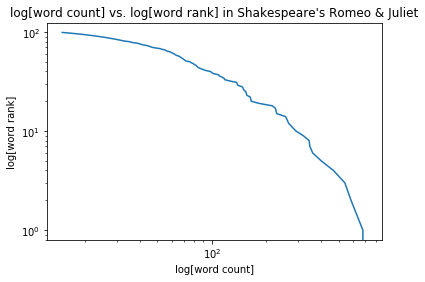

In [0]:
# Bonus: log(word count) vs. log(rank of word)

num_words = 100   # plot first <num_words> words
# count_dict contains <count:words with that count> (rank is index+1 in sorted count_dictionary)
counts = list(count_dict.keys())
ranks = []
for i in range(len(count_dict)):
    ranks.append(i)

plt.loglog(counts[:num_words], ranks[:num_words])
plt.xlabel('log[word count]')
plt.ylabel('log[word rank]')
plt.title('log[word count] vs. log[word rank] in Shakespeare\'s Romeo & Juliet')
plt.show()